# Converting json into dataframe

In [9]:
%%bash
head -n37 NYET_format.jsonl

{
  "event": "message",
  "id": "020000009dd7d000434c0600000000000000000000000000",
  "service": false,
  "out": false,
  "from": {
    "id": "$01000000610c4901c98b7dfcf0c76782",
    "when": "2017-10-06 19:43:20",
    "peer_type": "user",
    "peer_id": 21564513,
    "first_name": "Милежик",
    "print_name": "Милежик",
    "flags": 196609,
    "last_name": "",
    "username": "Dee_Milezhik",
    "phone": "79637685254"
  },
  "text": "Кек",
  "flags": 256,
  "to": {
    "members_num": 15,
    "id": "$020000009dd7d0000000000000000000",
    "admin": {
      "id": "$01000000000000000000000000000000",
      "peer_type": "user",
      "peer_id": 0,
      "print_name": "user#0"
    },
    "peer_type": "chat",
    "peer_id": 13686685,
    "print_name": "NYET:_Фэтблэймеры,_фэтхэйтеры,_флеймбластеры_и_Димка",
    "flags": 1,
    "title": "NYET: Фэтблэймеры, фэтхэйтеры, флеймбластеры и Димка"
  },
  "unread": false,
  "date": 1507307026
}


In [58]:
%%bash
cp NYET.jsonl NYET_tests.jsonl
sed -i '1s/^/[ /' ~/NYET_tests.jsonl
sed -i 's/$/ | ,/' ~/NYET_tests.jsonl
sed -i '$ s/.$//' ~/NYET_tests.jsonl
echo "]" >> NYET_tests.jsonl 

In [27]:
import ijson
import json

filename = "NYET_tests.jsonl"
filename2 = "NYET.jsonl"

data =[]

cols = ['event',
        'service',
        'out',
        'text',
        'date']

cols_from = ['peer_type',
             'peer_id',
             'first_name',
             'print_name',
             'last_name',
             'username',
             'phone']

cols_media = ['type']

all_cols = cols + cols_from + cols_media


In [28]:
with open(filename2,'r') as f:
    a = 0
    for line in f:
        current_row = []
        message = json.loads(line)
        for col in cols:
            current_row.append(message.get(col))
        for col in cols_from:
            current_row.append(message['from'].get(col))
        for col in cols_media:
            media = message.get('media')
            if isinstance(media,dict):
                current_row.append(media['type'])
            else:
                current_row.append('')
        data.append(current_row)
#        a += 1
#        if a >30:
#            break

In [62]:
import pandas as pd

df = pd.DataFrame(data, columns=all_cols)
df.to_csv('NYET.csv')
df.head(10)

,event,service,out,text,date,peer_type,peer_id,first_name,print_name,last_name,username,phone,type
0,message,False,False,Кек,1507307026,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,
1,message,False,False,"Может так случиться, что и я",1507307025,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,
2,message,False,False,Убей не помню,1507306892,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,
3,message,False,False,Кто мёд заказывал,1507306886,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,
4,message,False,False,Я,1507306869,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,
5,message,False,True,Кто газировки заказывал?,1507306754,user,121143792,Gleb,Gleb_Lobov,Lobov,lobzison,79150026987,
6,message,False,False,None,1507305990,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,document
7,message,False,False,None,1507305980,user,21564513,Милежик,Милежик,,Dee_Milezhik,79637685254,photo
8,message,False,False,None,1507298641,user,90312891,Haze,Haze_Holy,Holy,Hazz3,79153688261,document
9,message,False,False,Ты посрал?,1507298627,user,90312891,Haze,Haze_Holy,Holy,Hazz3,79153688261,


In [104]:
import datetime


df2 = []
df2 = df[['date', 'print_name', 'text', 'type']]

#this works, but pandas method is shorter and creates pandas datatimelike
#time_format = lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')
#df2[['date_f']] = df2[['date']].applymap(time_format)

df2["date_f"] = pd.to_datetime(df2["date"], unit='s')
df2.head(10)

/home/griffonuser/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date,print_name,text,type,date_f
0,1507307026,Милежик,Кек,,2017-10-06 16:23:46
1,1507307025,Милежик,"Может так случиться, что и я",,2017-10-06 16:23:45
2,1507306892,Милежик,Убей не помню,,2017-10-06 16:21:32
3,1507306886,Милежик,Кто мёд заказывал,,2017-10-06 16:21:26
4,1507306869,Милежик,Я,,2017-10-06 16:21:09
5,1507306754,Gleb_Lobov,Кто газировки заказывал?,,2017-10-06 16:19:14
6,1507305990,Милежик,None,document,2017-10-06 16:06:30
7,1507305980,Милежик,None,photo,2017-10-06 16:06:20
8,1507298641,Haze_Holy,None,document,2017-10-06 14:04:01
9,1507298627,Haze_Holy,Ты посрал?,,2017-10-06 14:03:47


In [130]:
import numpy as np
df2.groupby('type').size()
b = int(df.agg({'date': np.min}))
b = pd.to_datetime(b, unit='s')
e = int(df.agg({'date': np.max}))
e = pd.to_datetime(e, unit='s')
print('First message : {} \nLast message : {}'.format(b,e))

First message : 2015-08-27 15:05:54 
Last message : 2017-10-06 16:23:46


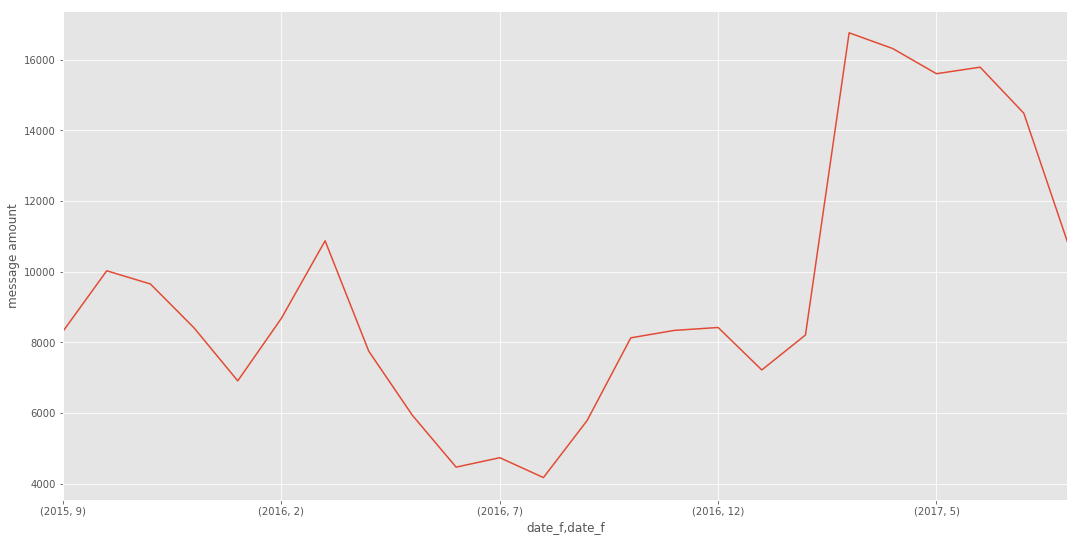

/home/griffonuser/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


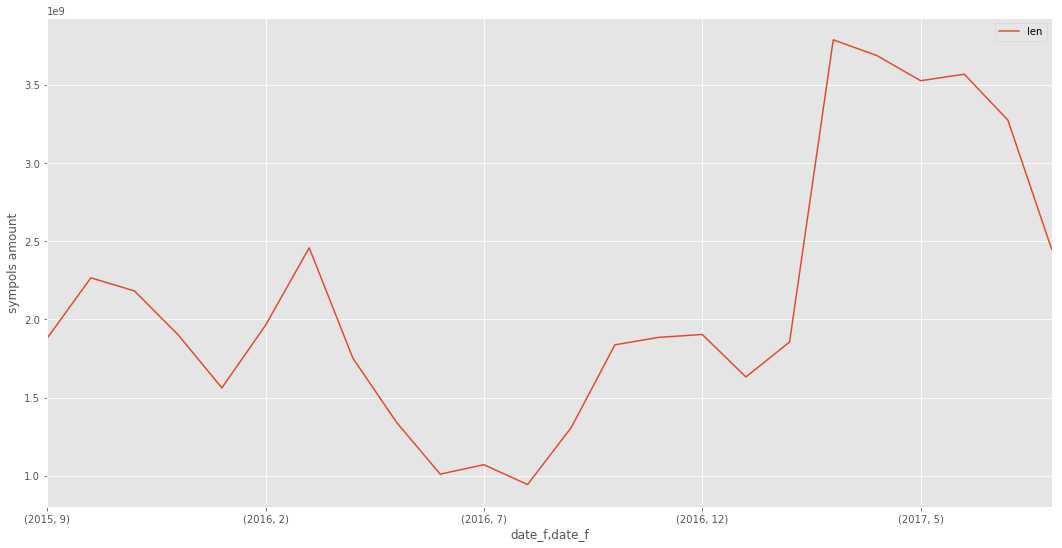

In [180]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (18, 9)

#fig=plt.figure(figsize=(18, 9), dpi= 80, facecolor='w', edgecolor='k')

begin = int(datetime.datetime.strptime('01/09/2015', '%d/%m/%Y').strftime("%s"))
end = int(datetime.datetime.strptime('01/09/2017', '%d/%m/%Y').strftime("%s"))

df3 = df2[(df2["date"] >= begin) & (df2["date"] <= end)]


df3.groupby([df3["date_f"].dt.year, df3["date_f"].dt.month]).size().plot(kind="line")
plt.ylabel('message amount')
plt.show()

df3['len'] = len(df3['text'])


df3.groupby([df3["date_f"].dt.year, df3["date_f"].dt.month]).agg({"len": np.sum}).plot(kind="line")
plt.ylabel('sympols amount')
plt.show()

Haze_Holy


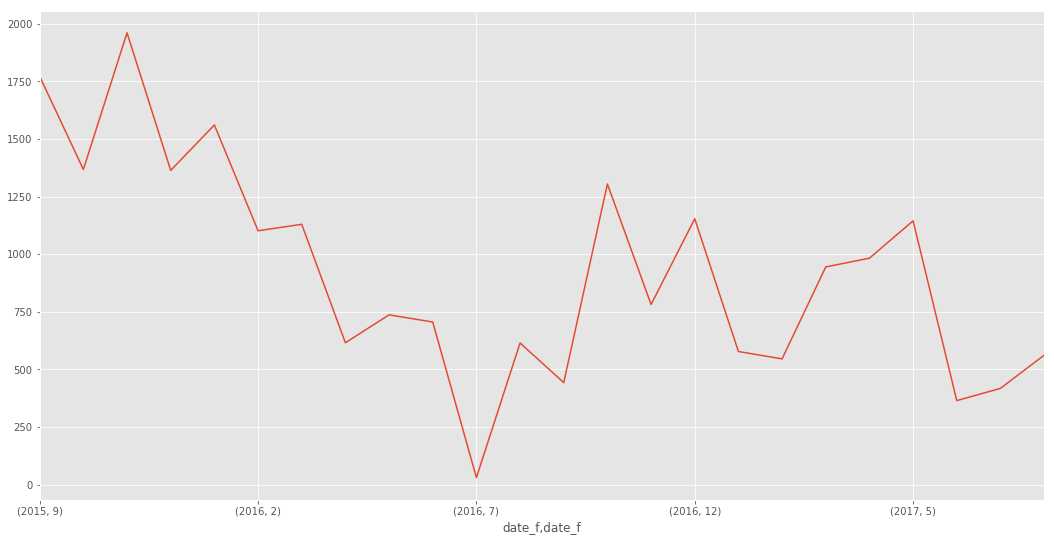

Милежик


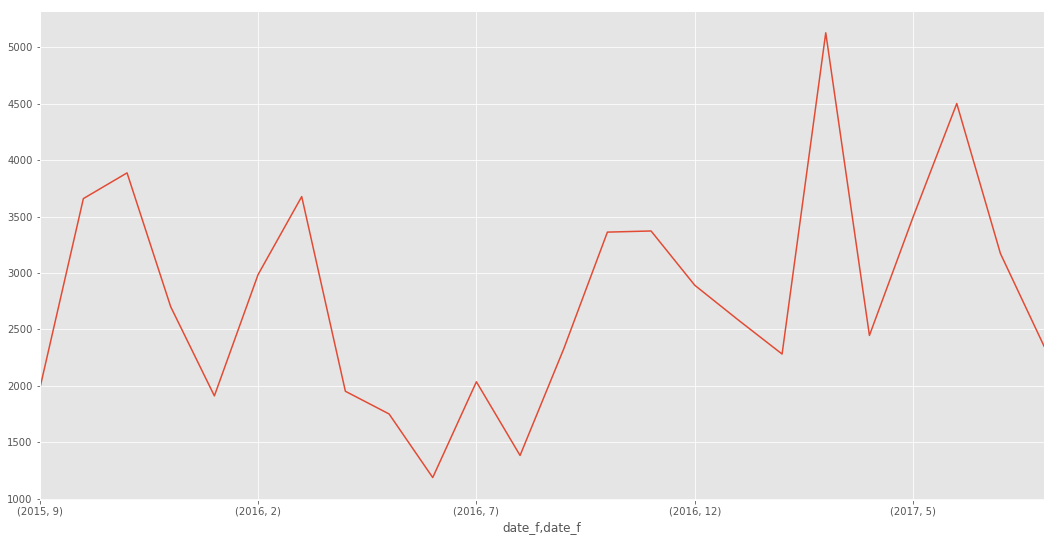

Denis_Spirin


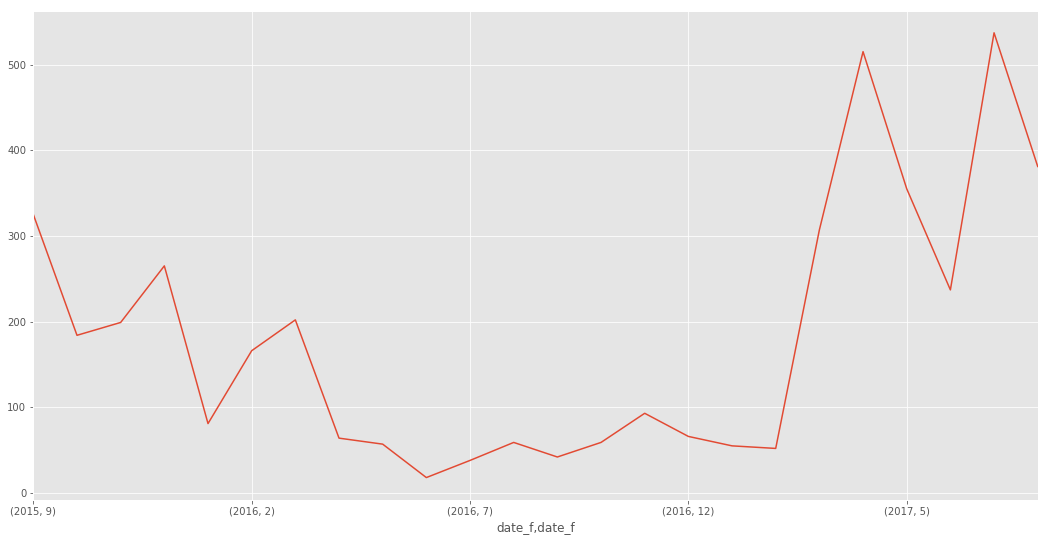

Evgeniy


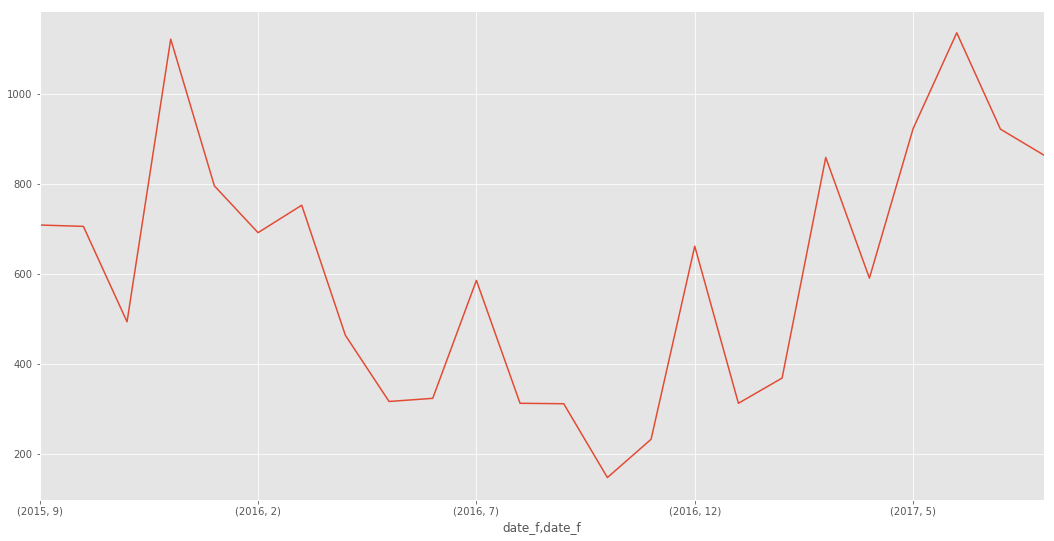

Скопа


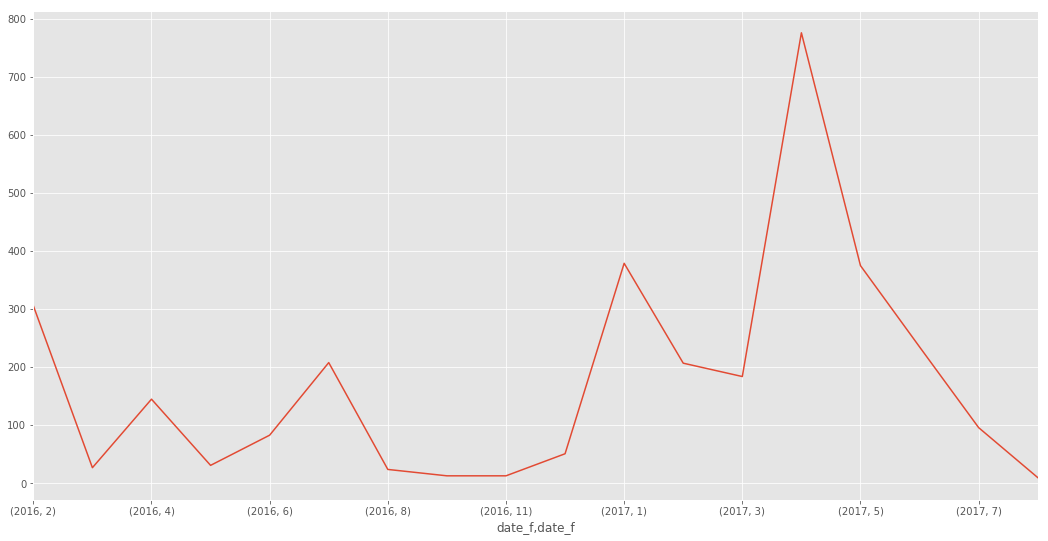

Матвей


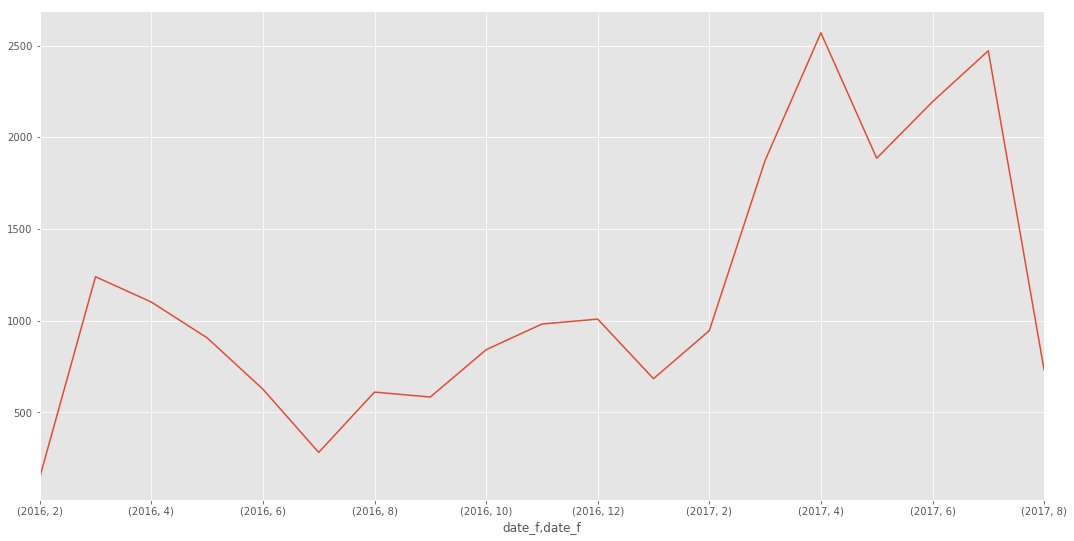

Руслан


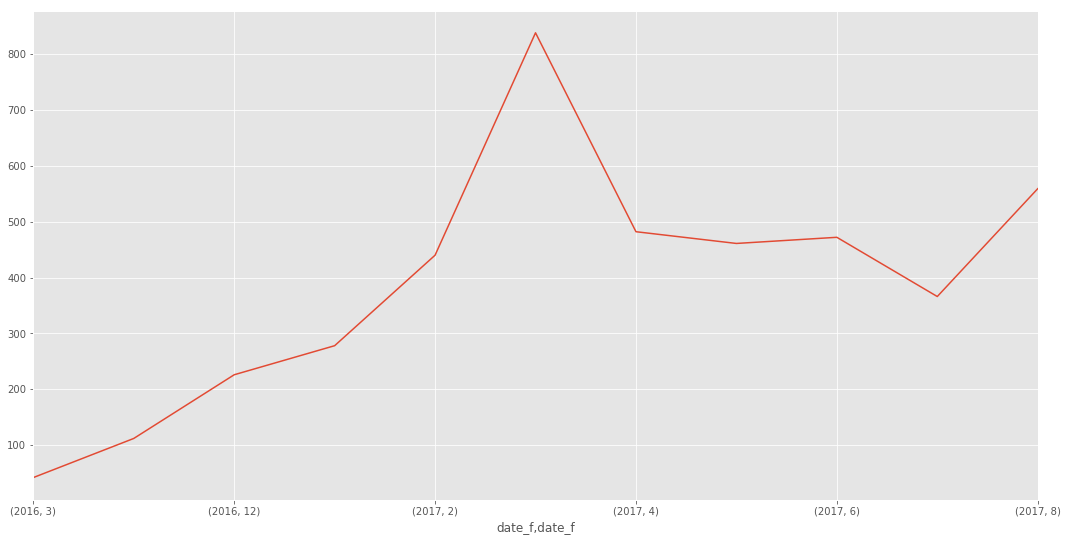

Темик_Друзяшка


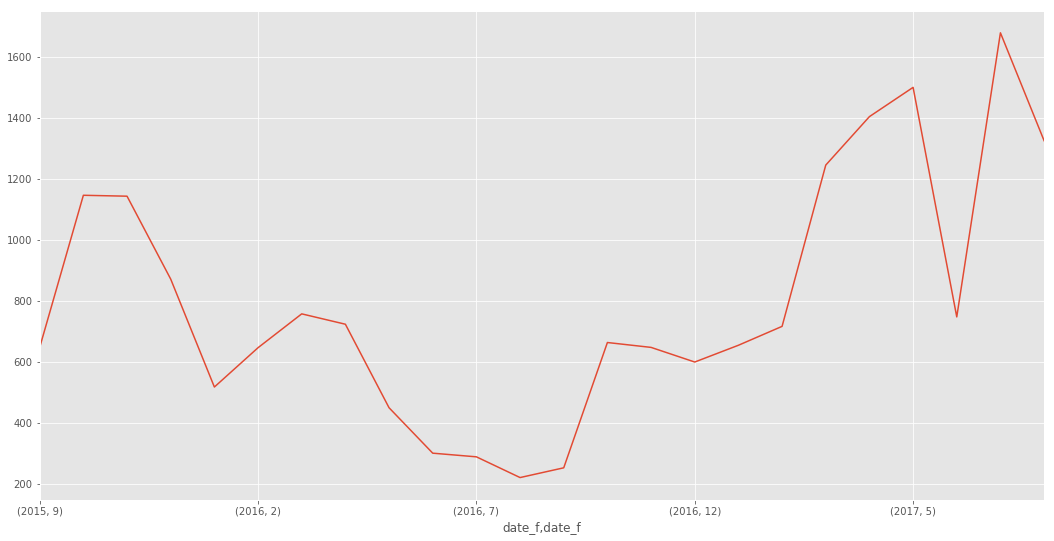

Gleb_Lobov


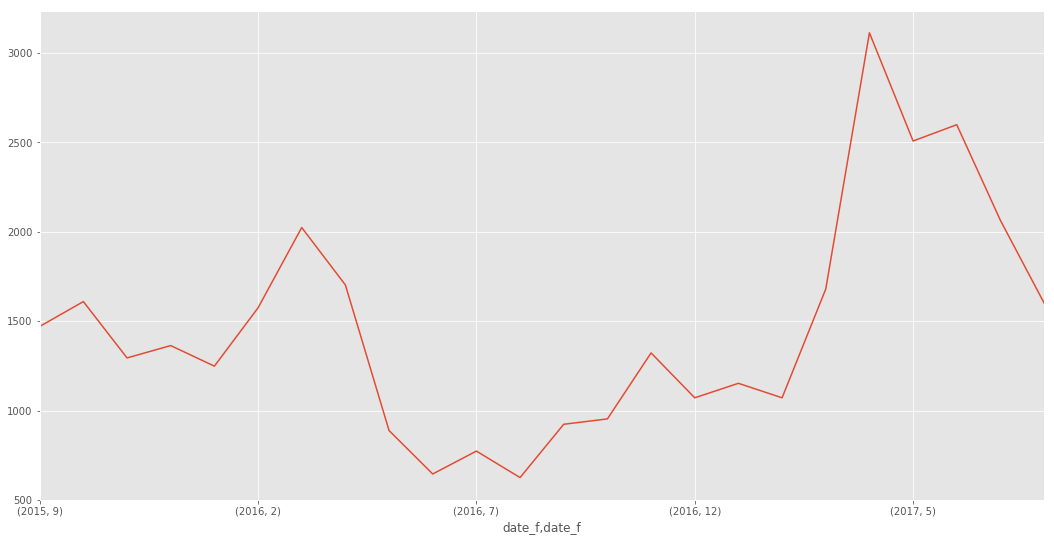

Николас


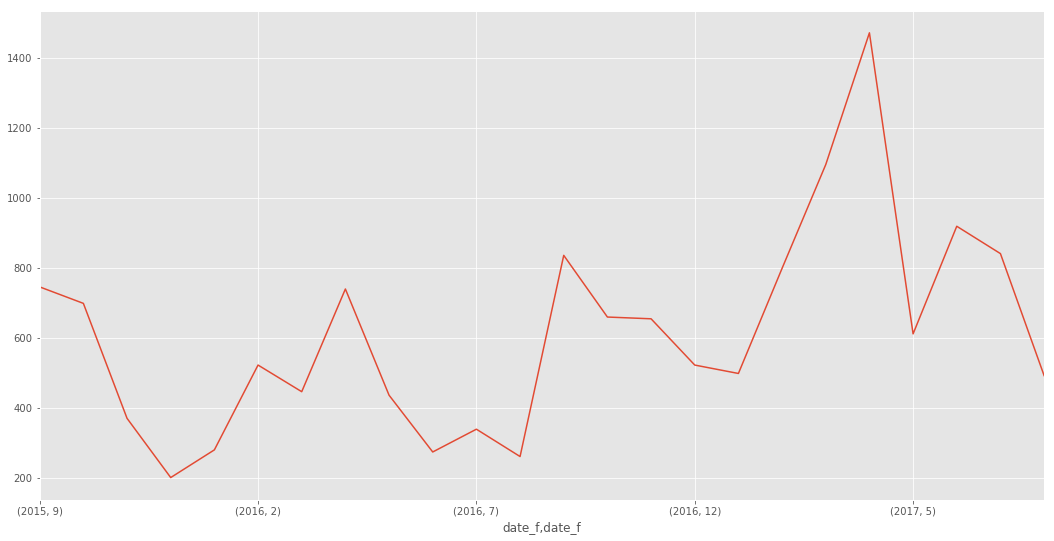

Ekaterina_Malakhova


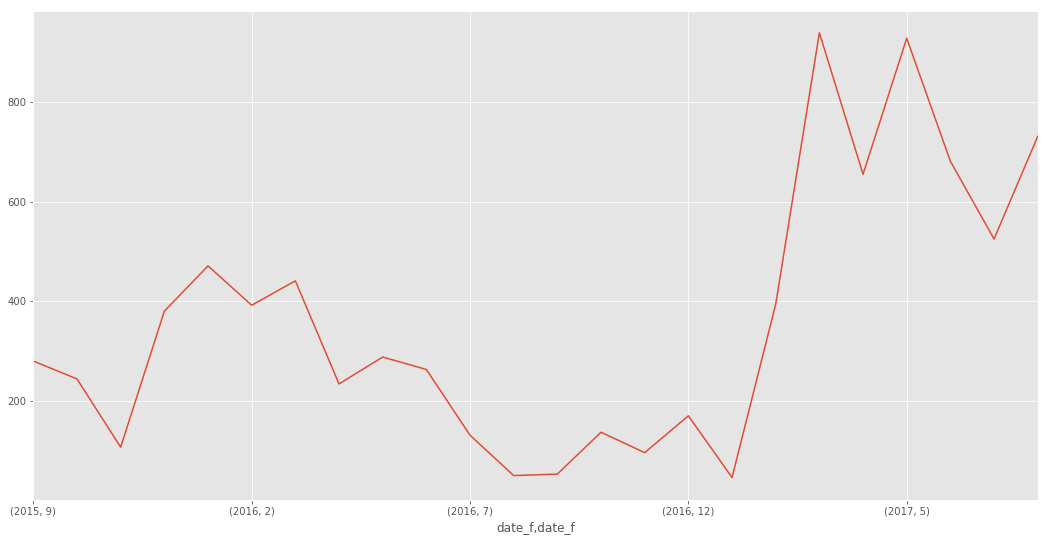

Max_Ivanov


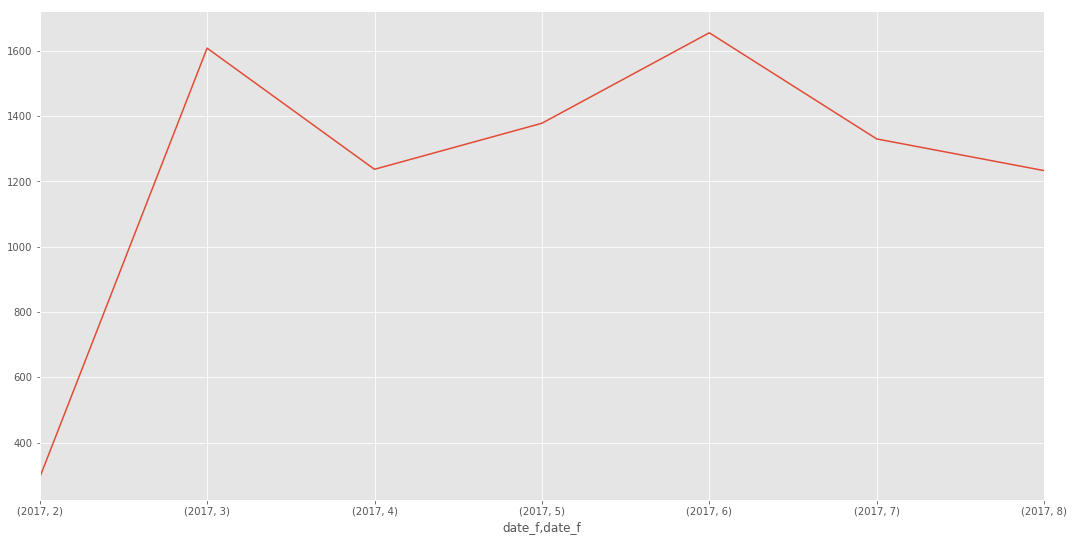

PollBot


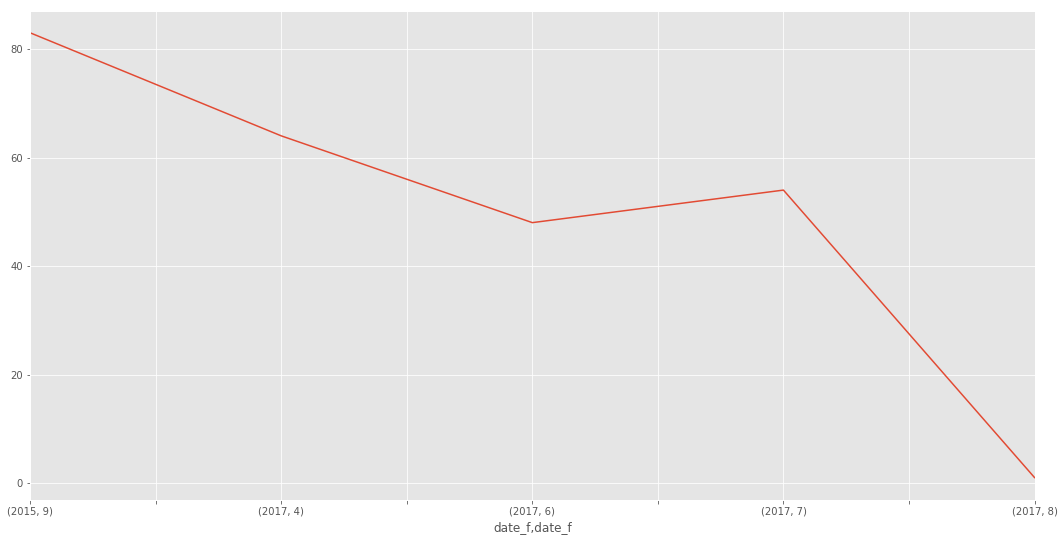

Армянин


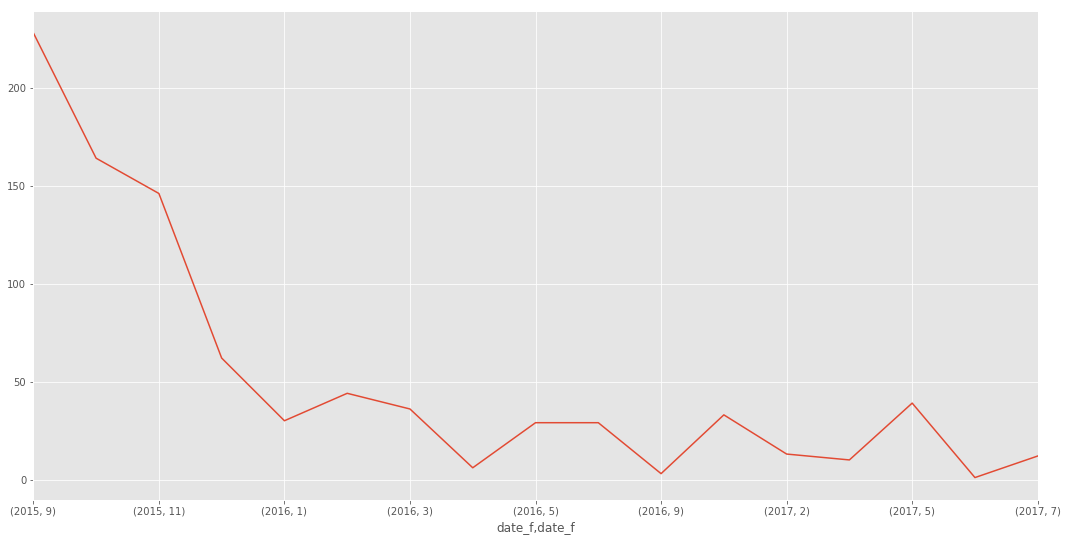

Виталя


/home/griffonuser/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


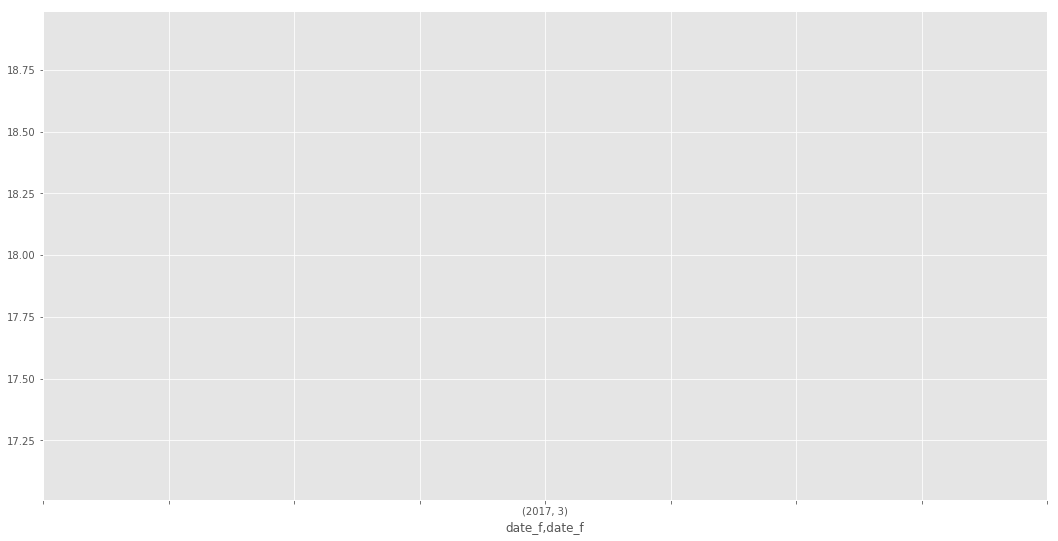

Nyasha_Fernandez


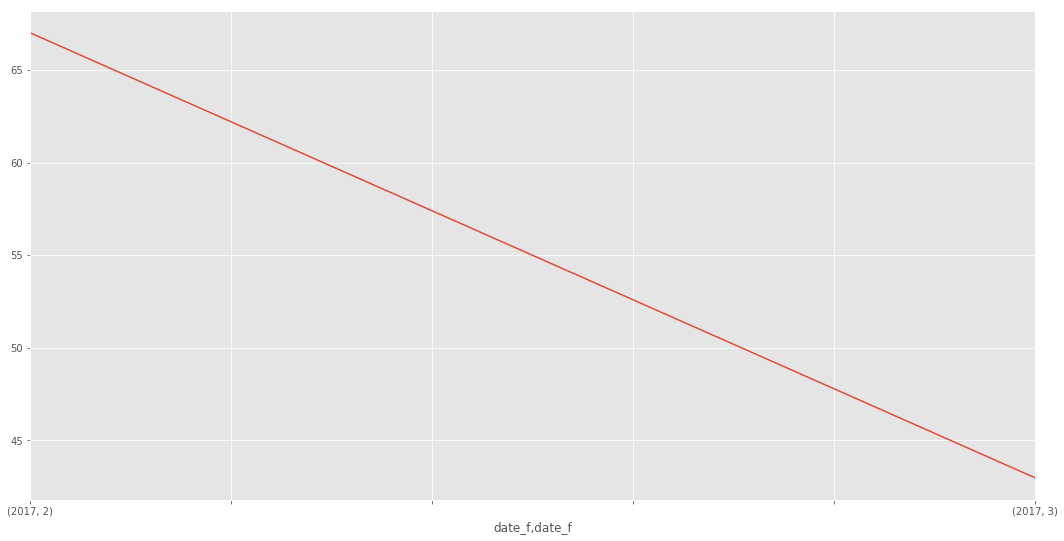

Ksu_Nya


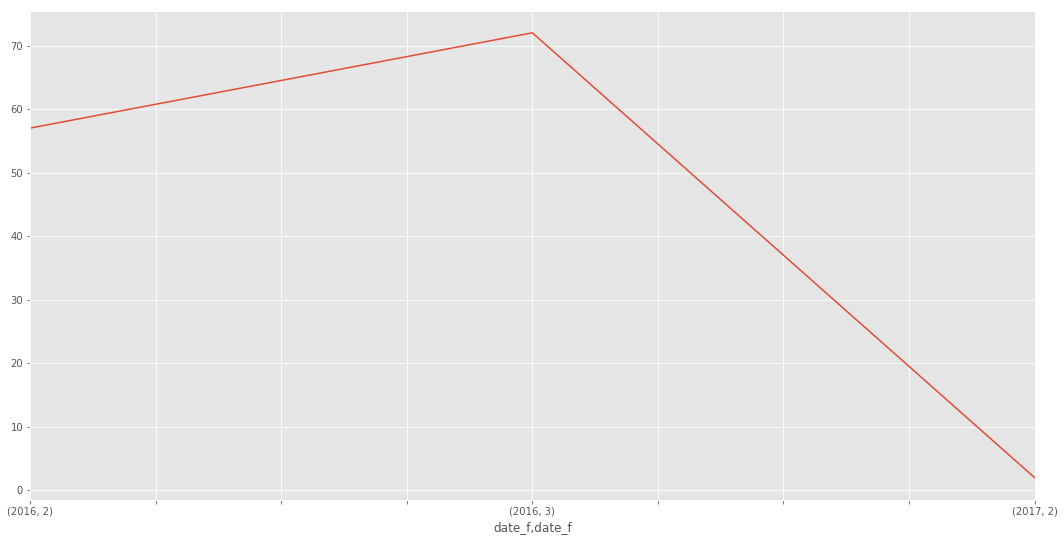

Rinat_Saetov


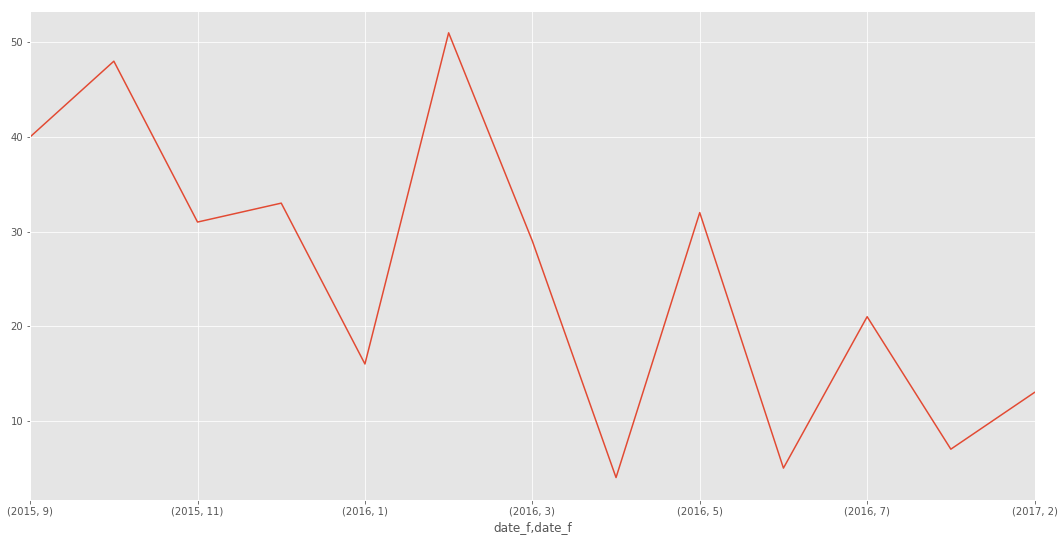

Sublime_Bot


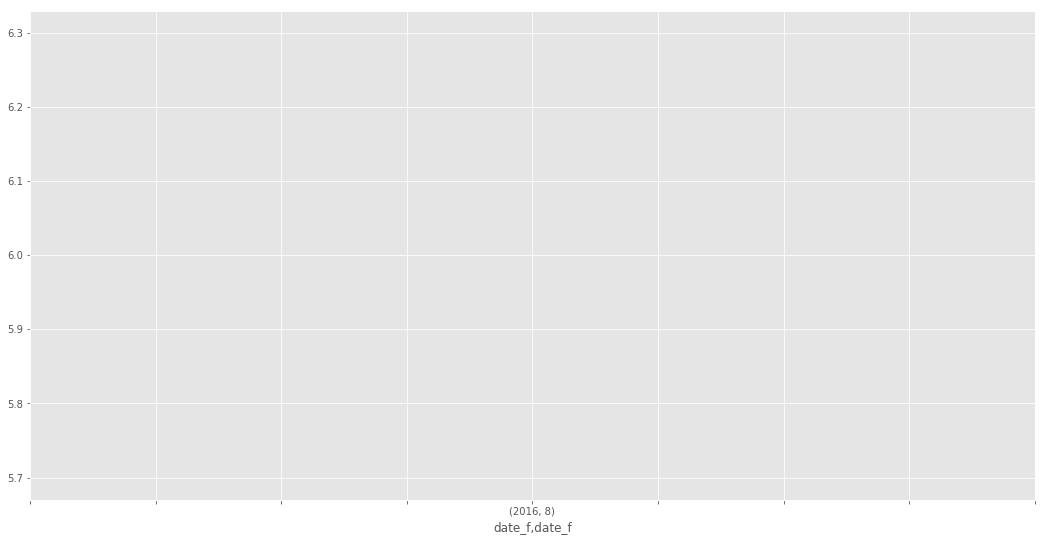

Say_Text


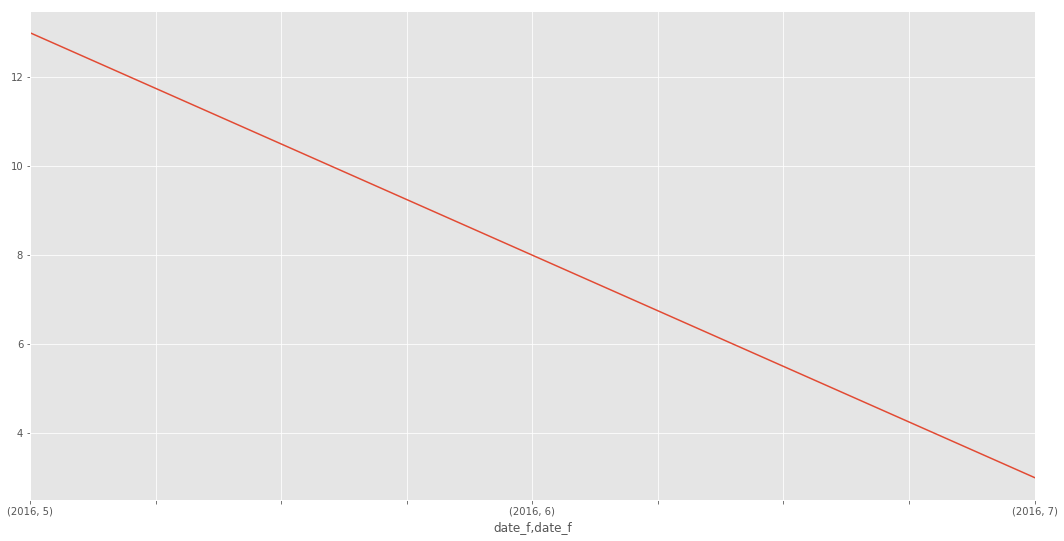

Alexander_Urnev


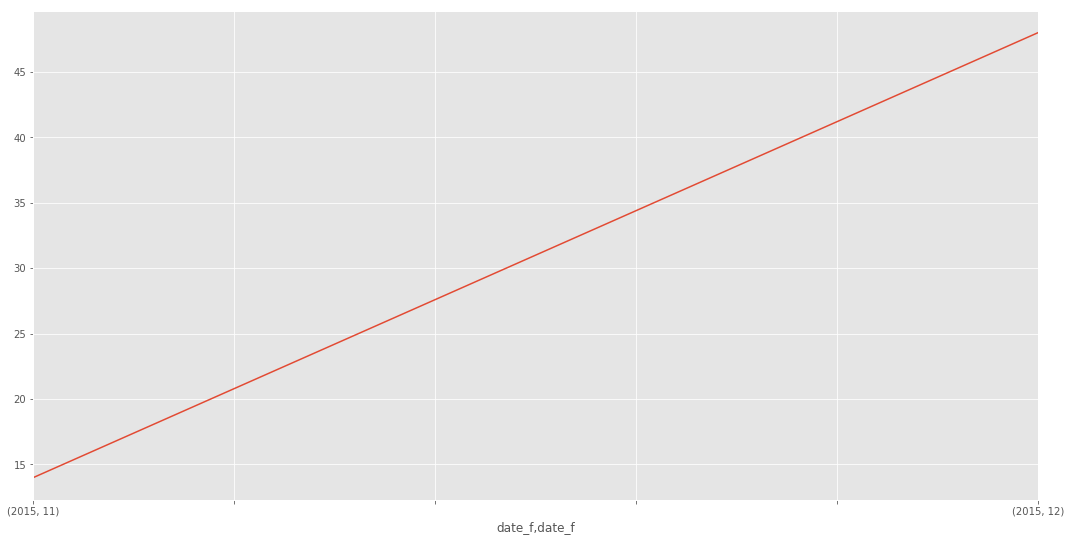

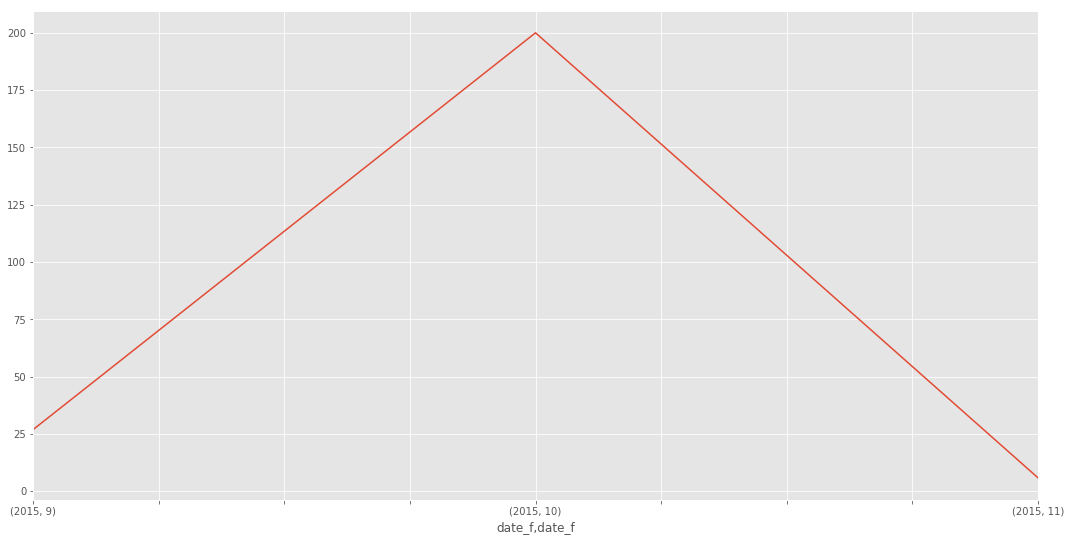

GrammarNaziBot


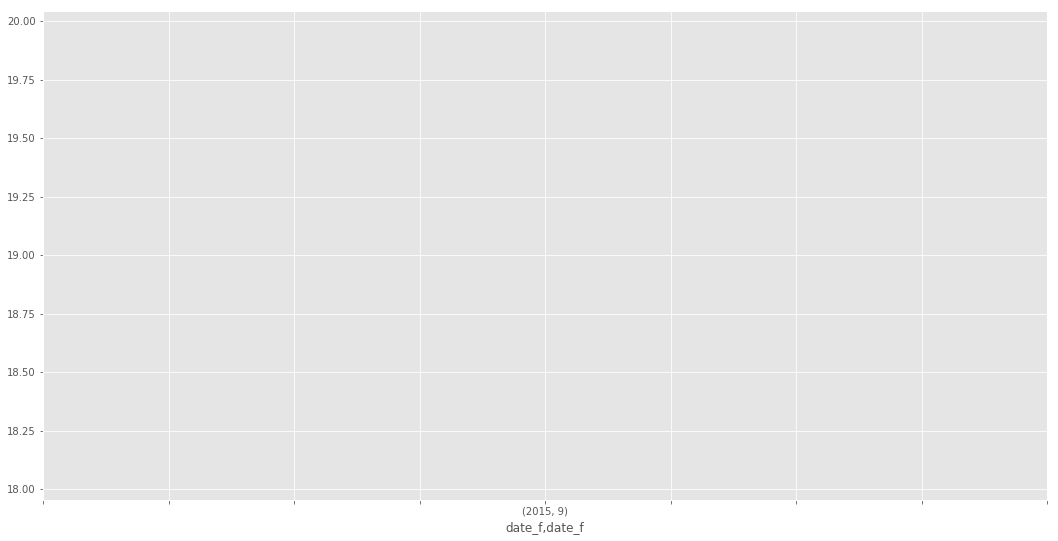

In [170]:
#fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')

users = df3["print_name"].unique()
for user in users:
    print(user)
    df3[df3["print_name"] == user].groupby([df3["date_f"].dt.year, df3["date_f"].dt.month]).size().plot(kind="line")
    plt.show()

In [171]:
users = df3["print_name"].unique()
#all users activity on the same plot

AttributeError: 'numpy.ndarray' object has no attribute 'remove'

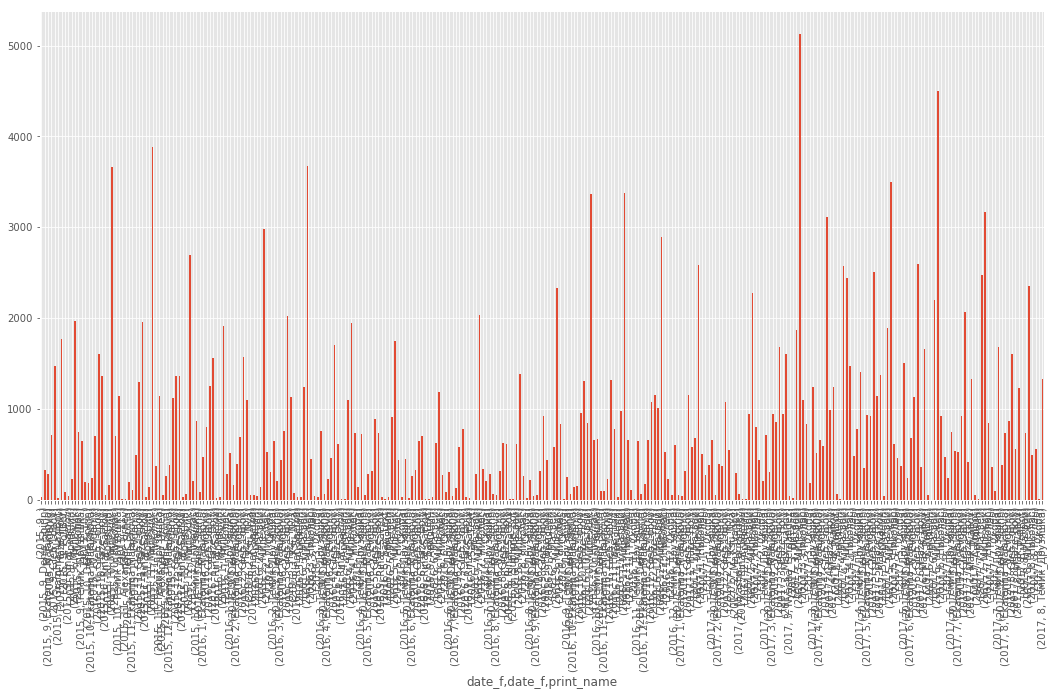

In [176]:
#gonvo kakoe to nu i pohui, pust' budet
df3.groupby([df3["date_f"].dt.year, df3["date_f"].dt.month, df3["print_name"]]).size().plot(kind="bar")
plt.show()